In [2]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import typing as ty

classical_electron_radius = 2.81794032e-15  # [m]
elec_rest_energy = 8.1871057880e-14  # [J]
MeV = 1.6022e-13  # [J]
barn = 1e-28  # [m2]
millimeter = 0.001 # [m]
mol = 6.021e23  # [/mol]
alpha = 1/137
speed_of_light = 299792458
hbar = 1.054571817e-34

0

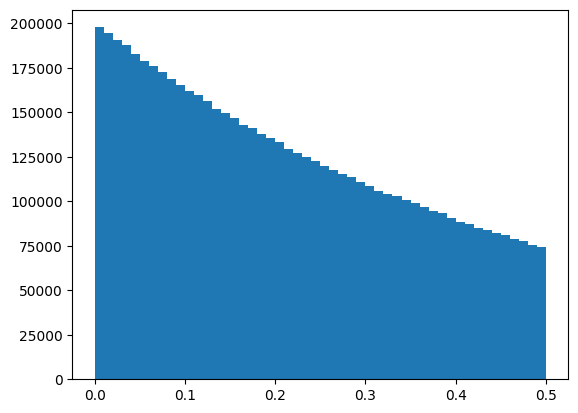

In [49]:
def expfo(
    n_steps: int,
    depth: float,
    p_density: float,
    n_rays_incident: int,
):
    dx = depth / n_steps
    p = 1 - np.exp(-np.sum(p_density) * dx)
    out = np.array([])
    n_rays = n_rays_incident
    for x in np.linspace(0, depth - dx, n_steps):
        n_rays_interacting = np.random.binomial(n_rays, p)
        n_rays -= n_rays_interacting
        out = np.concat([out, x + dx * np.random.random(n_rays_interacting)])
    return out
plt.hist(expfo(1000,0.5,2.0,10_000_000), bins=50)
0

0

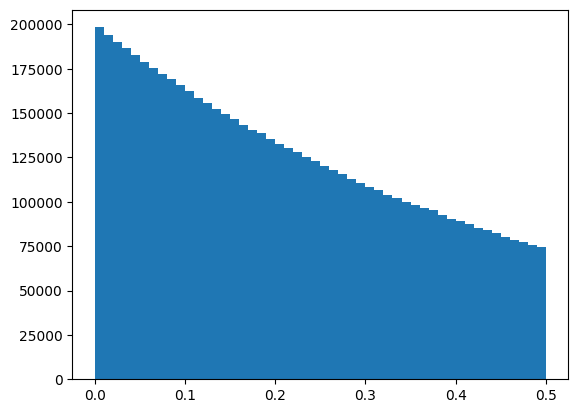

In [50]:
def expfo(
    depth: float,
    p_density: float,
    n_rays_incident: int,
):
    p = 1 - np.exp(-p_density * depth)
    n_rays_interacting = np.random.binomial(n_rays_incident, p)
    v = np.random.random(n_rays_interacting)
    return -1 / p_density * np.log(1 - v * (1 - np.exp(-p_density * depth)))


plt.hist(expfo(0.5, 2.0, 10_000_000), bins=50)
0